In [1]:
'''
Done!!
Bar plot


TODO

BAR and Scatter
scatter plot
count plot


'''

'\nDone!!\nBar plot\n\n\nTODO\n\nBAR and Scatter\nscatter plot\ncount plot\n\n\n'

In [2]:
# https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/plotly-extension

In [3]:
import seaborn as sns
sns.set(style="whitegrid")

tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")

In [4]:
import numpy as np

In [5]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

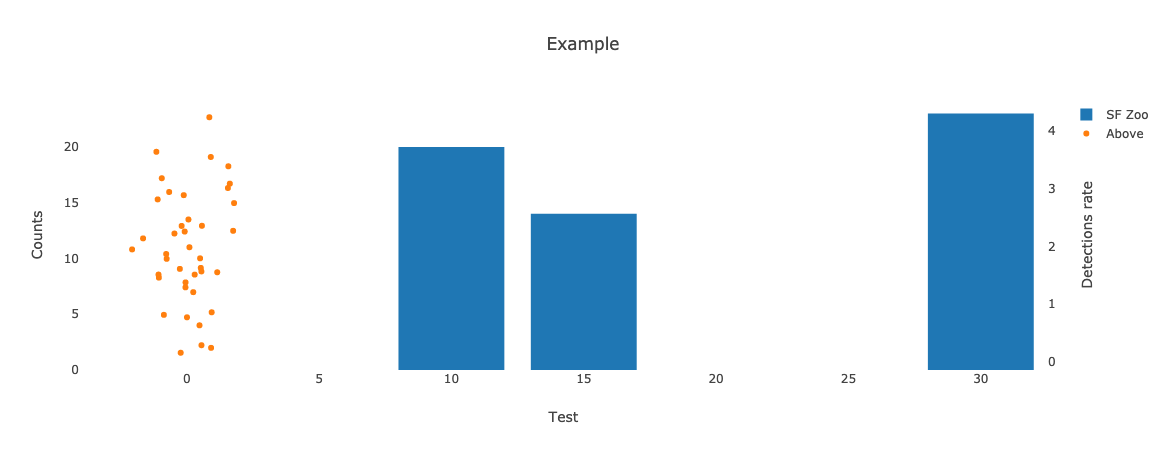

In [4]:
trace1 = go.Bar(
    x=[10, 15, 30],
    y=[20, 14, 23],
    name='SF Zoo'
)
trace2 = go.Bar(
    x=['giraffes', 'orangutans', 'monkeys'],
    y=[12, 18, 29],
    name='LA Zoo'
)
N = 40
trace3 = go.Scatter(
    x = np.random.randn(N),
    y = np.random.randn(N)+2,
    name = 'Above',
    mode = 'markers',
    yaxis='y2'
    
)

data = [trace1, trace3]
layout = go.Layout(
    barmode='group',
    title='Example',
    xaxis = dict(title = f'Test',
                 showgrid=False,
                 zeroline=False,
                 showline=False,),
    
    yaxis = dict(title = 'Counts',
                 showgrid=False,
                 zeroline=False,
                 showline=False,),
    yaxis2 = dict(title = 'Detections rate',
                 showgrid=False,
                 overlaying='y',
                 side='right',
                 zeroline=False,
                 showline=False,),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [44]:
def get_bar_trace(group, x, y, eval_type, name):
    group = group.groupby(x).agg({y:eval_type}).reset_index()
    trace = go.Bar(
        x=group[x].values,
        y=group[y].values,
        name=name
    )
    return trace


def barplot(data, x, y, hue=None, palette=None, title='Example', barmode='group', eval_type='mean', type='plotly'):
    traces = []
    
    if hue is None:
        trace = get_bar_trace(data, x, y, eval_type, x)
        traces.append(trace)
    else:
        for name, group in data.groupby(hue):
            trace = get_bar_traces(group, x, y, eval_type, name)
            traces.append(trace)
    
    data = traces
    layout = go.Layout(
        barmode=barmode,
        title=title,
        xaxis = dict(title = x,
                     showgrid=False,
                     zeroline=False,
                     showline=False,),

        yaxis = dict(title = y,
                     showgrid=False,
                     zeroline=False,
                     showline=False,),
        bargap=0.1,
        bargroupgap=0.1,
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='grouped-bar')

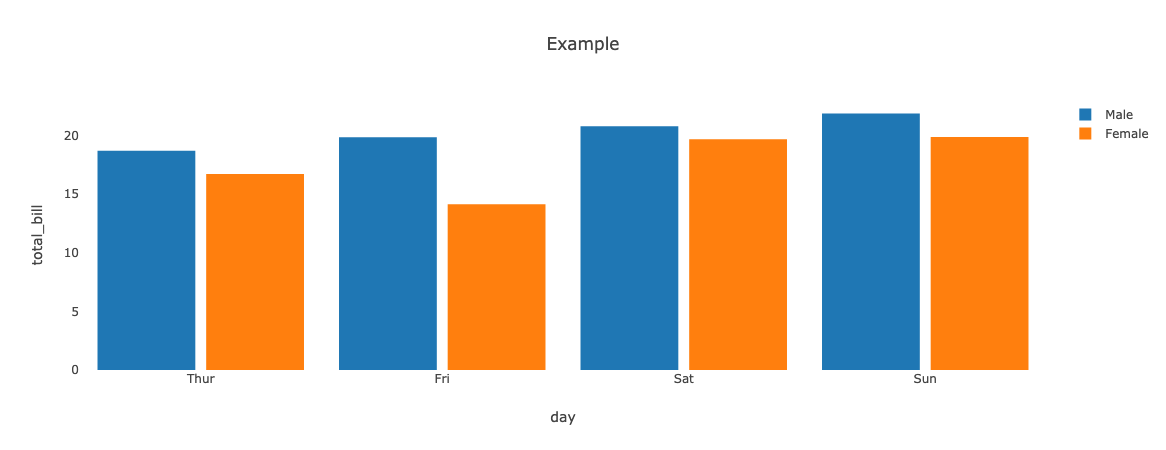

In [45]:
barplot(tips, x='day', y='total_bill', hue='sex', palette=None, type='plotly')

In [9]:
tips.groupby('day').agg({'total_bill':'mean'}).reset_index()

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


In [ ]:
variables = {
    'categorical_columns': len(categorical_columns),
    'binary_variables': len(binary_variables),
    'true_numerical_columns': len(true_numerical_columns)
}
pie_trace = go.Pie(labels=list(variables.keys()), values=list(variables.values()))
layout = dict(title= "Variable types", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
iplot(fig)
67.5%
22.9%

In [ ]:
def plot_categorical_feature(col, only_bars=False, top_n=10, by_touch=False):
    top_n = top_n if train[col].nunique() > top_n else train[col].nunique()
    print(f"{col} has {train[col].nunique()} unique values and type: {train[col].dtype}.")
    print(train[col].value_counts(normalize=True, dropna=False).head())
    if not by_touch:
        if not only_bars:
            df = train.groupby([col]).agg({'HasDetections': ['count', 'mean']})
            df = df.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
            data = [go.Bar(x=df.index, y=df['HasDetections']['count'].values, name='counts'),
                    go.Scatter(x=df.index, y=df['HasDetections']['mean'], name='Detections rate', yaxis='y2')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories and mean target value",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis2=dict(title='Detections rate', overlaying='y', side='right')),
                           legend=dict(orientation="v"))

        else:
            top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
            df0 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 1), col].value_counts().head(10).sort_index()
            df1 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 0), col].value_counts().head(10).sort_index()
            data = [go.Bar(x=df0.index, y=df0.values, name='Has Detections'),
                    go.Bar(x=df1.index, y=df1.values, name='No Detections')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                ),
                           legend=dict(orientation="v"), barmode='group')
        
        py.iplot(dict(data=data, layout=layout))
        
    else:
        top_n = 10
        top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
        df = train.loc[train[col].isin(top_cat)]

        df1 = train.loc[train['Census_IsTouchEnabled'] == 1]
        df0 = train.loc[train['Census_IsTouchEnabled'] == 0]

        df0_ = df0.groupby([col]).agg({'HasDetections': ['count', 'mean']})
        df0_ = df0_.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
        df1_ = df1.groupby([col]).agg({'HasDetections': ['count', 'mean']})
        df1_ = df1_.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
        data1 = [go.Bar(x=df0_.index, y=df0_['HasDetections']['count'].values, name='Nontouch device counts'),
                go.Scatter(x=df0_.index, y=df0_['HasDetections']['mean'], name='Detections rate for nontouch devices', yaxis='y2')]
        data2 = [go.Bar(x=df1_.index, y=df1_['HasDetections']['count'].values, name='Touch device counts'),
                go.Scatter(x=df1_.index, y=df1_['HasDetections']['mean'], name='Detections rate for touch devices', yaxis='y2')]

        layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories for nontouch devices",
                            xaxis = dict(title = f'{col}',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,
                                         type='category'),
                            yaxis = dict(title = 'Counts',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,),
                                    yaxis2=dict(title='Detections rate', overlaying='y', side='right'),
                            ),
                       legend=dict(orientation="v"), barmode='group')

        py.iplot(dict(data=data1, layout=layout))
        layout['title'] = f"Counts of {col} by top-{top_n} categories for touch devices"
        py.iplot(dict(data=data2, layout=layout))